# Adjust transparency based on brightness

In [19]:
from PIL import Image, ImageOps

import numpy as np
import matplotlib.pyplot as plt

resize_degree = 1

img = Image.open("testimg1.jpeg")
# fix img rotate issue
img = ImageOps.exif_transpose(img)

img = img.resize((int(img.size[0]*(resize_degree)), int(img.size[1]*(resize_degree))))

# rgba data of origin img
imgData = img.convert("RGBA")

# put in numpy array
imgData_np = np.array(imgData)

# grayscaling
gray = img.convert("L")

가로 픽셀: 3024
세로 픽셀: 4032
변형을 진행할 총 픽셀 수: 12192768


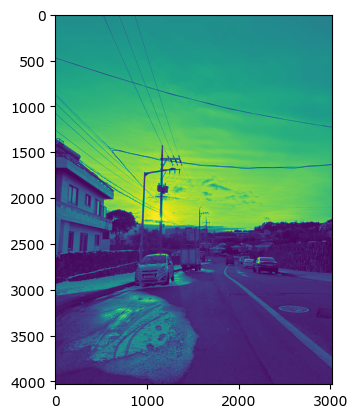

In [20]:
allpixel_amount = gray.width * gray.height
print('가로 픽셀: ' + str(gray.width) + '\n세로 픽셀: ' + str(gray.height) 
      + '\n변형을 진행할 총 픽셀 수: ' + str(gray.width * gray.height))

plt.imshow(gray)

In [21]:
#print(imgData_np)

In [22]:
# 이미지 rgba numpy array로 변환하자마자 다시 이미지로 바꾸는 테스트
originImg = imgData_np.astype('uint8')
originImg = Image.fromarray(imgData_np, "RGBA")
originImg.save('originImg.png', 'png')

In [23]:
# save brightness of pixels in numpy array
brightness_values = np.array(gray).flatten()

print("Brightness values: ", brightness_values)

Brightness values:  [123 122 123 ...  21  27  28]


In [24]:
# img processing
from tqdm import tqdm # indicate progression degree module

newData = imgData_np
pixel_pos = 0 # now pixel position (flatten index)

print('start.')

# img Alpha change and save
for i in tqdm(range(imgData_np.shape[0])):
    for j in range(imgData_np.shape[1]):
        #print(str(pixel_pos))
        newData[i, j, 0] = 0 # R = 0
        newData[i, j, 1] = 0 # G = 0
        newData[i, j, 2] = 0 # B = 0
        newData[i, j, 3] = brightness_values[pixel_pos]
        pixel_pos = pixel_pos + 1 # count

edited_img = Image.fromarray(newData, "RGBA")
print("end processing. \n\n")
#print("[result]\n" + str(newData))

start.


100%|██████████████████████████████████████| 4032/4032 [00:06<00:00, 632.59it/s]

end processing. 




In [25]:
# save edited img
edited_img.save('edited_img1.png', 'png')

print('saved.')

saved.
